# Shear-switched-on part (autoconversion is below). 

In [93]:
!ls /Users/bmapes/Box/Tsai_Mapes_CM1_2024data_from_weather2/CM1_RAD4K_120x120_autooff_SWITCHON_EXP

run                      timeseries2D.nc
src                      timeseries3D_t170-259.nc


In [6]:
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [8]:
ds = xr.open_dataset('/Users/bmapes/Box/Tsai_Mapes_CM1/cm1out_2Dvars_shearonbelt.nc')

In [9]:
ds

<xarray.Dataset>
Dimensions:  (time: 361, nj: 120, ni: 120)
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 00:20:00 ... 5 days 00:00:00
Dimensions without coordinates: nj, ni
Data variables: (12/15)
    rain     (time, nj, ni) float32 ...
    sws      (time, nj, ni) float32 ...
    srs      (time, nj, ni) float32 ...
    sus      (time, nj, ni) float32 ...
    cref     (time, nj, ni) float32 ...
    v10      (time, nj, ni) float32 ...
    ...       ...
    cwp      (time, nj, ni) float32 ...
    lwp      (time, nj, ni) float32 ...
    pwat     (time, nj, ni) float32 ...
    cape     (time, nj, ni) float32 ...
    cin      (time, nj, ni) float32 ...
    lfc      (time, nj, ni) float32 ...
Attributes: (12/71)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0
    history:      Fri Sep  6 15:09:04 2024: ncrcat -v rain,pwat,cwp,lwp,v10,t...
    NCO:          netCDF Operators version 5.0.2 (Homepage = http://nco.sf.ne...

In [7]:
timelatP = ds.prate.mean(dim='lon')

In [9]:
timelatP.coarsen

<xarray.DataArray 'prate' (time: 1440, lat: 120)>
array([[9.12986507e-05, 3.49868526e-04, 7.18977753e-05, ...,
        8.10957426e-05, 1.15718562e-04, 6.58433710e-05],
       [7.57659291e-05, 4.59780567e-04, 1.05242587e-04, ...,
        8.60785367e-05, 1.22088633e-04, 5.79625303e-05],
       [5.78804647e-05, 1.76538742e-04, 7.16614013e-05, ...,
        8.31331490e-05, 7.21338656e-05, 4.26615516e-05],
       ...,
       [6.49076446e-06, 2.49513541e-05, 3.94835188e-05, ...,
        6.30167597e-06, 1.95923021e-05, 1.47235405e-05],
       [3.99212604e-06, 1.52833309e-05, 2.29942380e-05, ...,
        2.94096003e-06, 1.06170673e-05, 9.08529728e-06],
       [3.96359337e-06, 1.20528321e-05, 1.46451030e-05, ...,
        1.29458465e-06, 5.65378787e-06, 5.92447168e-06]], dtype=float32)
Coordinates:
  * time     (time) object 0001-07-03 00:00:00 ... 1440-07-03 00:00:00
  * lat      (lat) float64 1.0 3.0 5.0 7.0 9.0 ... 231.0 233.0 235.0 237.0 239.0

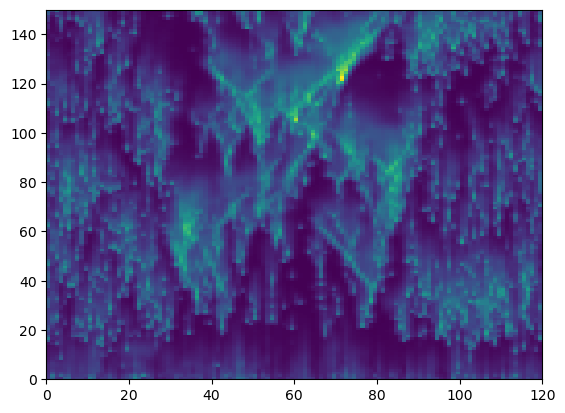

In [44]:
plt.pcolormesh( np.sqrt(ds.prate.mean(dim='lon'))[0:150,:] )

In [15]:
ds.time.

<xarray.DataArray 'time' (time: 1440)>
array([cftime.DatetimeGregorian(1, 7, 3, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2, 7, 3, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(3, 7, 3, 0, 0, 0, 0, has_year_zero=False), ...,
       cftime.DatetimeGregorian(1438, 7, 3, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1439, 7, 3, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1440, 7, 3, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * time     (time) object 0001-07-03 00:00:00 ... 1440-07-03 00:00:00
Attributes:
    standard_name:  time
    axis:           T

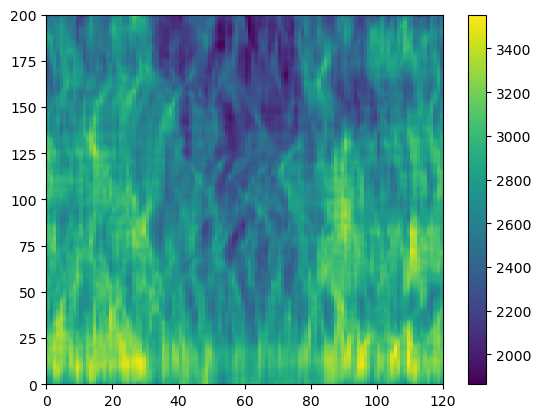

In [20]:
plt.pcolormesh( ds.cape.mean(dim='lon')[0:200,:] ); plt.colorbar()

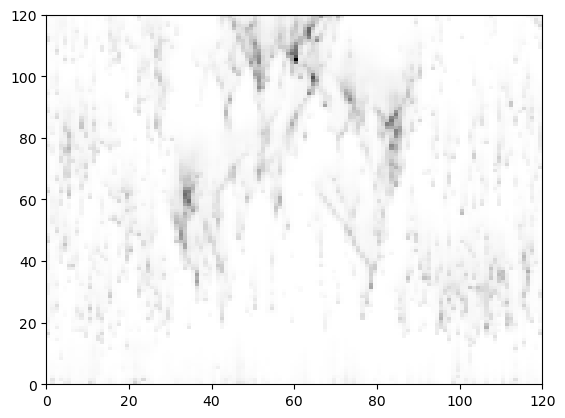

In [48]:
plt.pcolormesh(  ds.prate.mean(dim='lon').coarsen(lat=1).mean()[0:120,:], cmap='Greys' )

# Autoconversion switched off suddenly at 180 x 20minutes 

In [94]:
!ls /Users/bmapes/Box/Tsai_Mapes_CM1_2024data_from_weather2/CM1_RAD4K_120x120_autooff_SWITCHON_EXP

run                      timeseries2D.nc
src                      timeseries3D_t170-259.nc


In [95]:
ds = xr.open_dataset('/Users/bmapes/Box/Tsai_Mapes_CM1_2024data_from_weather2/CM1_RAD4K_120x120_autooff_SWITCHON_EXP/timeseries2D.nc')
ds3d = xr.open_dataset('/Users/bmapes/Box/Tsai_Mapes_CM1_2024data_from_weather2/CM1_RAD4K_120x120_autooff_SWITCHON_EXP/timeseries3D_t170-259.nc')

In [288]:
# ds.time.values/1200000000000
tt = np.arange(0,361/3.,1./3.) 
nj = ds.nj.values

(50.0, 120.0)

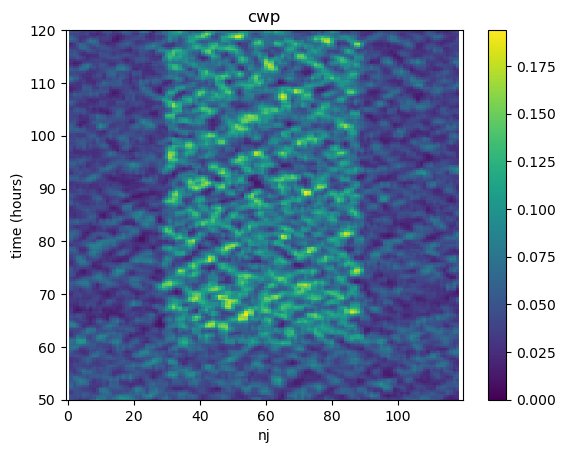

In [291]:
field = 'cwp'

lat_time = ds[field].mean('ni').rolling(time=3,nj=3,center=True).mean()

#plt.figure(figsize=(5,15))
plt.pcolormesh(nj,tt, lat_time); 
plt.xlabel('nj'); plt.ylabel('time (hours)'); 
plt.title(field); plt.colorbar();
plt.ylim([50,120])

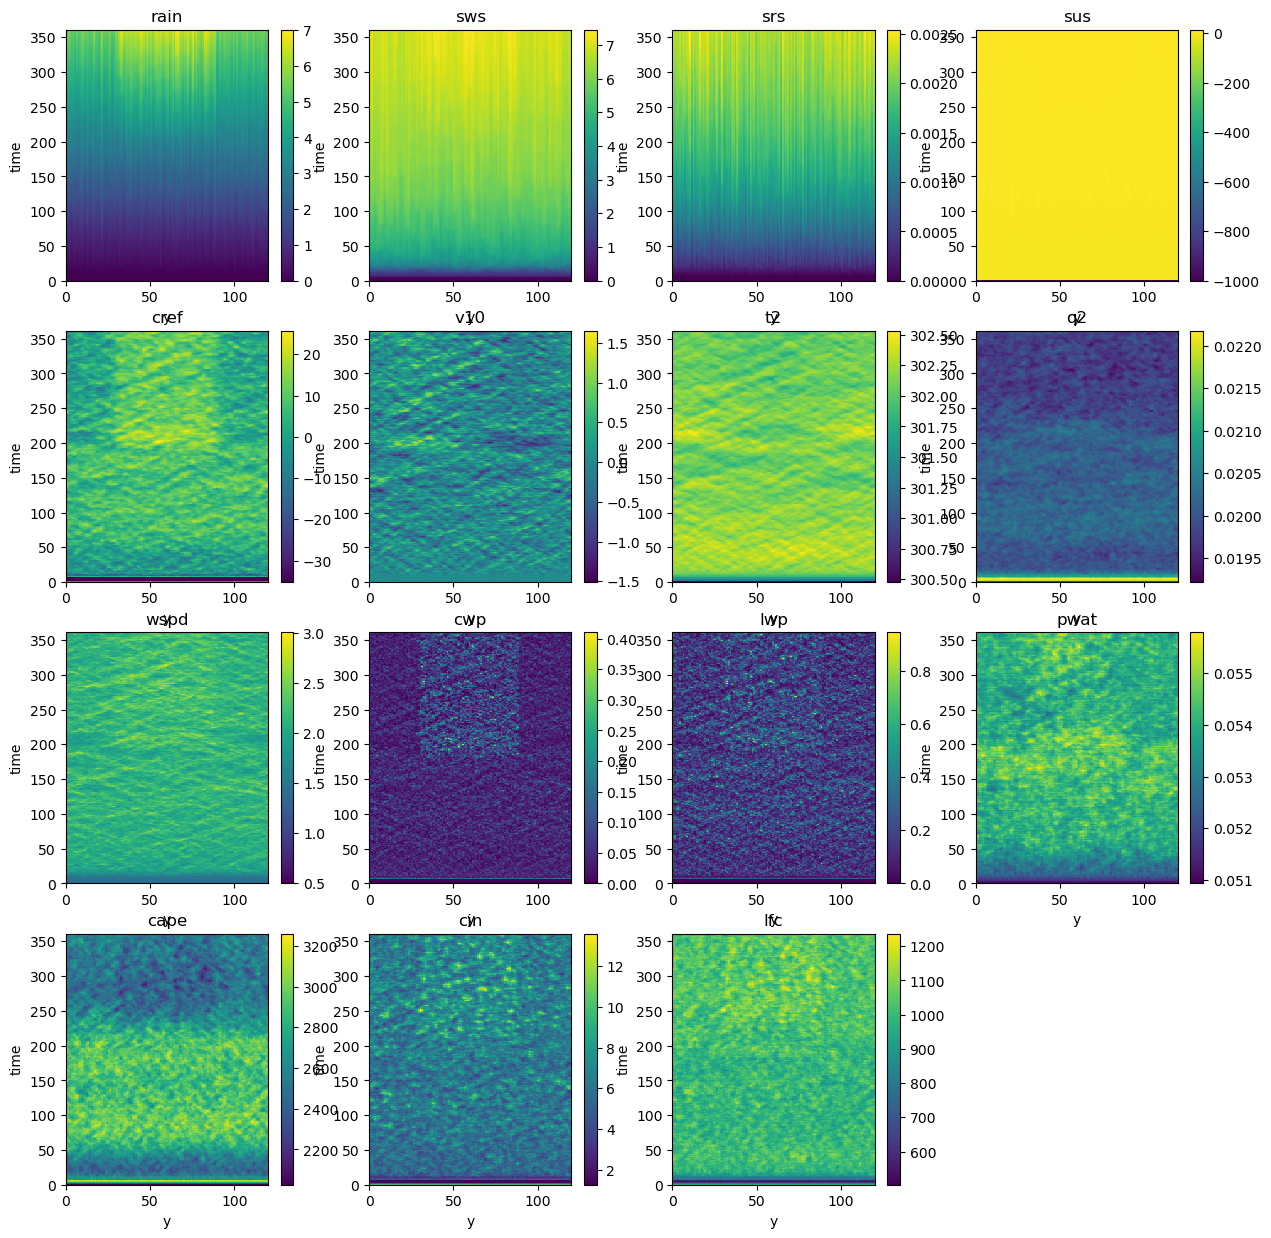

In [102]:
# Plot all the fields 
fields = list( ds.data_vars.keys() )

plt.figure(figsize=(15,15))
for i,field in enumerate(fields):

    plt.subplot(4,4,i+1)
    lat_time = ds[field].mean('ni')
    plt.pcolormesh(lat_time); plt.xlabel('y'); plt.ylabel('time'); plt.title(field); plt.colorbar();

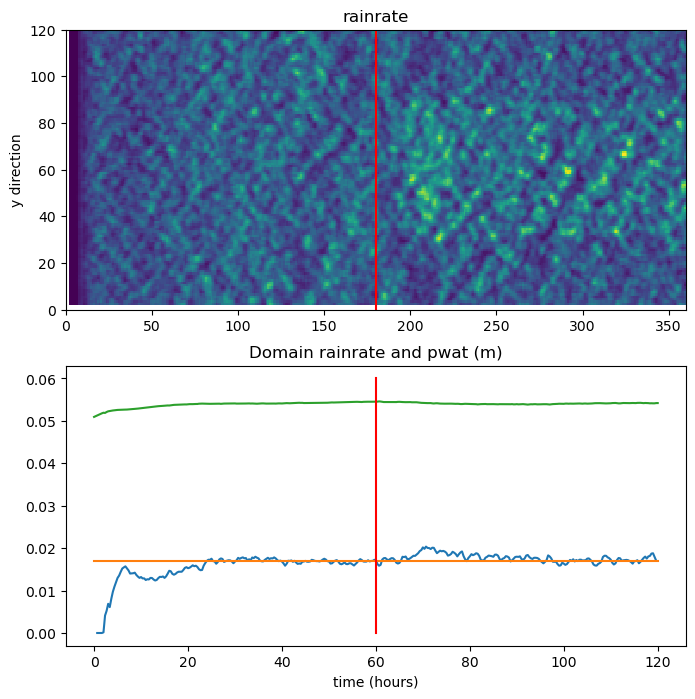

In [300]:
field = 'rainrate'

plt.figure( figsize=(8,8) )

plt.subplot(211)
lat_time = ds['rain'].diff('time').mean('ni').rolling(time=3,nj=3).mean()
plt.pcolormesh(lat_time.transpose()); 
plt.ylabel('y direction'); 
plt.title(field) #; plt.colorbar()
plt.plot([180,180], [0,120], 'red')

plt.subplot(212) 
plt.plot(tt[0:360],  lat_time.mean('nj')); 
plt.plot([0,360/3],[0.017,0.017])
plt.plot(tt,  ds.pwat.mean('nj').mean('ni') )
plt.xlabel('time (hours)'); 
plt.title('Domain rainrate and pwat (m)');
plt.plot([60,60], [0,0.06], 'red')

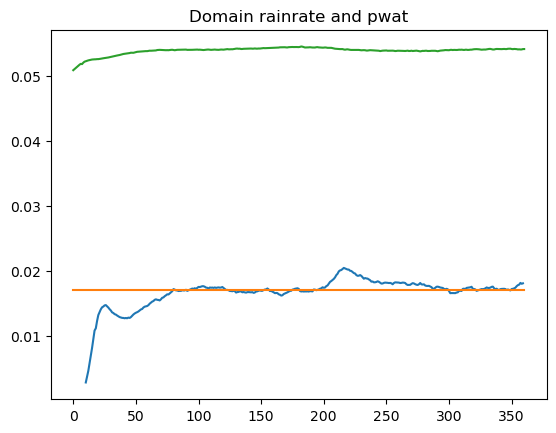

In [241]:
plt.subplot(122) 
plt.plot(lat_time.mean('nj')); plt.plot([0,360],[0.017,0.017])
plt.plot(  ds.pwat.mean('nj').mean('ni') )
plt.title('Domain rainrate and pwat');

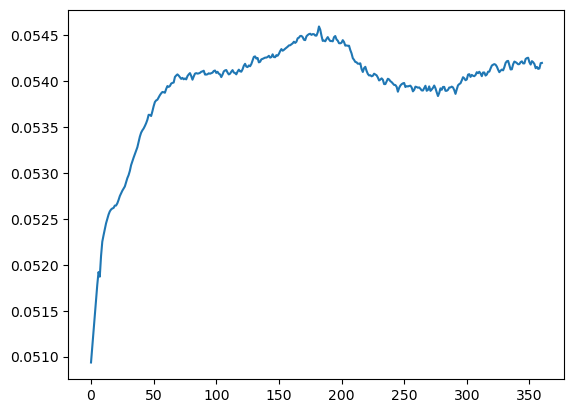

In [233]:
plt.plot(  ds.pwat.mean('nj').mean('ni'))

In [114]:
#timeseries3D_t170-259.nc')
ds3d

<xarray.Dataset>
Dimensions:   (time: 90, nk: 65, nj: 120, ni: 120, njp1: 121, nkp1: 66)
Coordinates:
  * time      (time) timedelta64[ns] 2 days 08:20:00 ... 3 days 14:00:00
Dimensions without coordinates: nk, nj, ni, njp1, nkp1
Data variables:
    qv        (time, nk, nj, ni) float32 ...
    qc        (time, nk, nj, ni) float32 ...
    qr        (time, nk, nj, ni) float32 ...
    qi        (time, nk, nj, ni) float32 ...
    qs        (time, nk, nj, ni) float32 ...
    buoyancy  (time, nk, nj, ni) float32 ...
    v         (time, nk, njp1, ni) float32 -1.121 -0.6576 ... -0.2692 -0.2492
    w         (time, nkp1, nj, ni) float32 ...
Attributes: (12/71)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0
    history:      Fri Sep  6 19:20:36 2024: ncrcat -v qc,qr,qi,qs,qv,v,w,buoy...
    NCO:          netCDF Operators version 5.0.2 (Homepage = http://nco.sf.ne...

In [305]:
# for plot labels 
t = np.arange(-200,1600,20)/60 # 60 values, in minutes, convert to hous with division by 60|
z = np.arange(1,66,1)

In [306]:
# Make mean data in belt and wings 

beltmean = ds3d.isel(nj=slice(30,90)).mean('nj').mean('ni')
wingmean =(ds3d.isel(nj=slice(0,29)).mean('nj')*0.5 + ds3d.isel(nj=slice(91,120-1)).mean('nj')*0.5) .mean('ni')

# for staggered njp1 too (v uses this coordinate)
beltmean = beltmean.isel(njp1=slice(30,90)).mean('njp1')
wingmean = wingmean.isel(njp1=slice( 0,29)).mean('njp1')*0.5 + wingmean.isel(njp1=slice(91,120-1)).mean('njp1')*0.5

In [307]:
beltmean

<xarray.Dataset>
Dimensions:   (time: 90, nk: 65, nkp1: 66)
Coordinates:
  * time      (time) timedelta64[ns] 2 days 08:20:00 ... 3 days 14:00:00
Dimensions without coordinates: nk, nkp1
Data variables:
    qv        (time, nk) float32 0.01895 0.01799 0.01758 ... 8.812e-06 7.681e-06
    qc        (time, nk) float32 9.054e-11 9.376e-11 1.22e-10 ... 0.0 0.0 0.0
    qr        (time, nk) float32 2.358e-05 2.344e-05 2.345e-05 ... 0.0 0.0 0.0
    qi        (time, nk) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    qs        (time, nk) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    buoyancy  (time, nk) float32 0.06273 0.0378 0.02417 ... -0.004146 0.004801
    v         (time, nk) float32 -0.02719 -0.02808 -0.02809 ... 0.0197 0.02052
    w         (time, nkp1) float32 0.0 -0.0002681 -0.0006584 ... 0.0002275 0.0

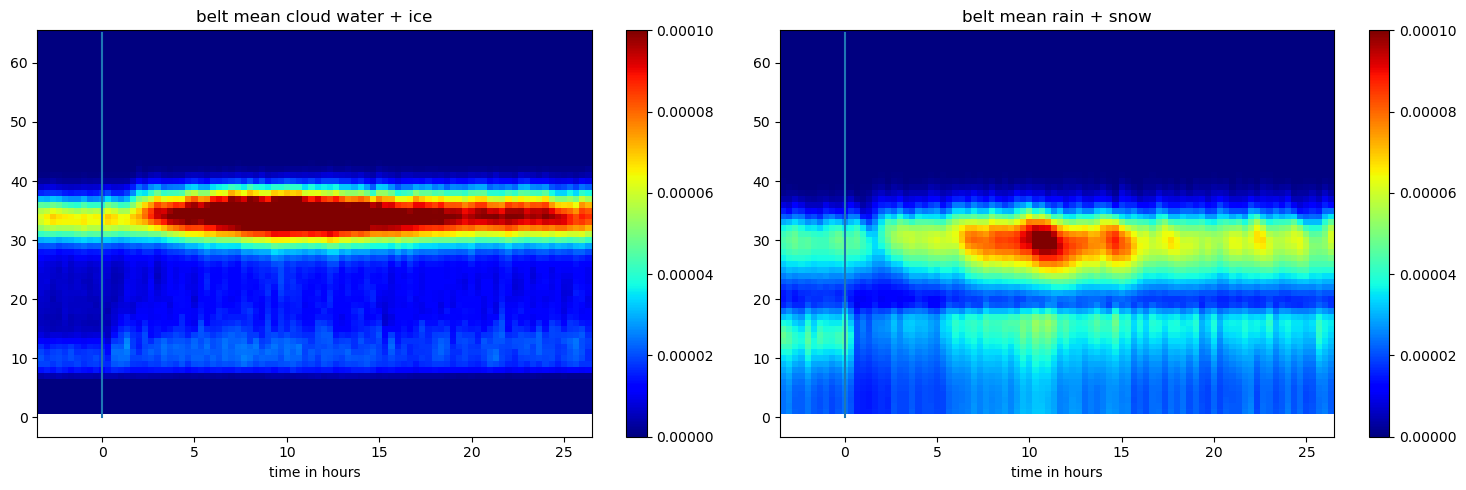

In [308]:
# BELT MEAN VALUES 

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.pcolormesh(t,z, (beltmean.qc + beltmean.qi).transpose() , cmap='jet', vmax=1e-4); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('belt mean cloud water + ice');

plt.subplot(122) 
plt.pcolormesh(t,z, (beltmean.qr + beltmean.qs).transpose() , cmap='jet', vmax=1e-4); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('belt mean rain + snow');

plt.tight_layout()

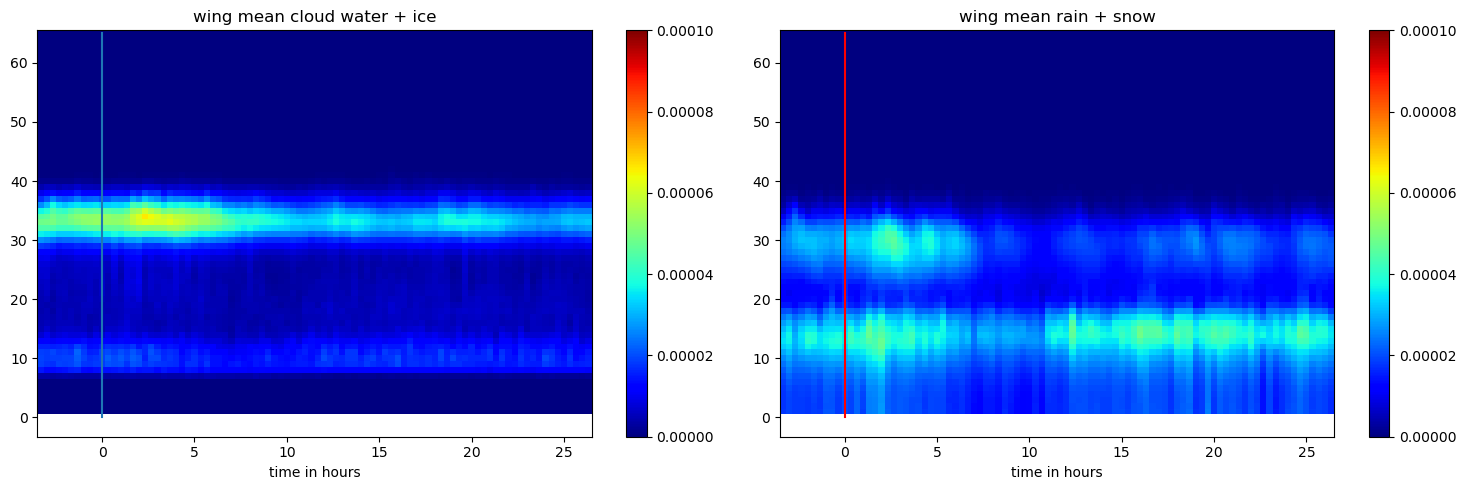

In [309]:
# wing MEAN VALUES 

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.pcolormesh(t,z, (wingmean.qc + wingmean.qi).transpose() , cmap='jet', vmax=1e-4); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('wing mean cloud water + ice');

plt.subplot(122) 
plt.pcolormesh(t,z, (wingmean.qr + wingmean.qs).transpose() , cmap='jet', vmax=1e-4); plt.colorbar()
plt.plot([0,0],[0,65],'red')
plt.xlabel('time in hours')
plt.title('wing mean rain + snow');

plt.tight_layout()

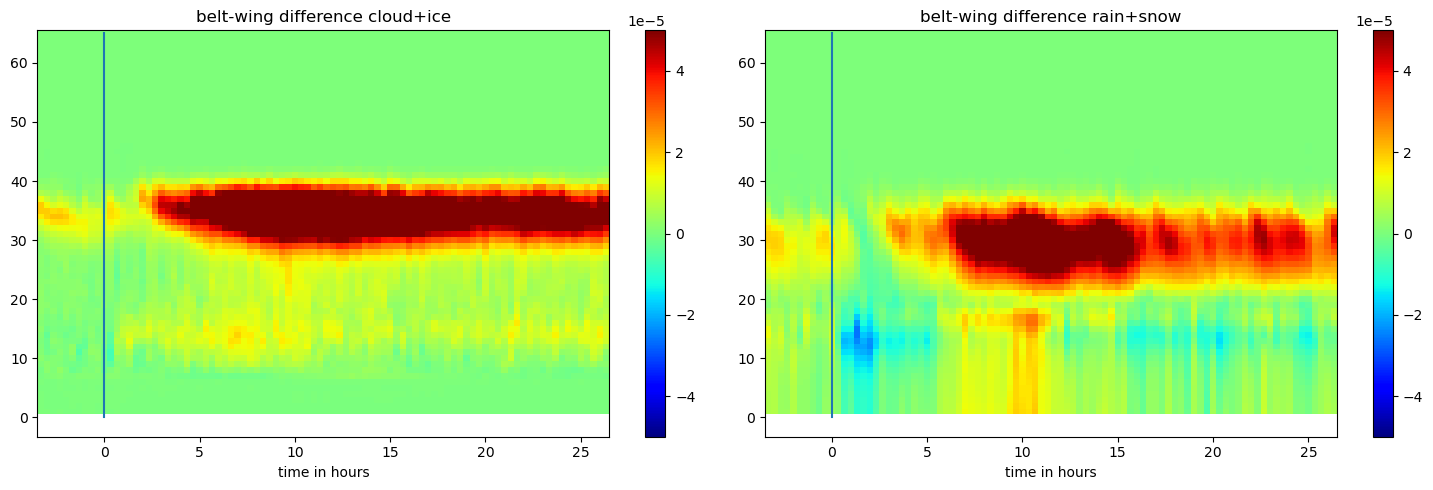

In [310]:
beltdiff = beltmean-wingmean

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.pcolormesh(t,z, (beltdiff.qc + beltdiff.qi).transpose() , cmap='jet', vmin = -5e-5, vmax=5e-5); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('belt-wing difference cloud+ice');

plt.subplot(122)
plt.pcolormesh(t,z, (beltdiff.qr + beltdiff.qs).transpose() , cmap='jet', vmin = -5e-5, vmax=5e-5); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('belt-wing difference rain+snow');

plt.tight_layout()

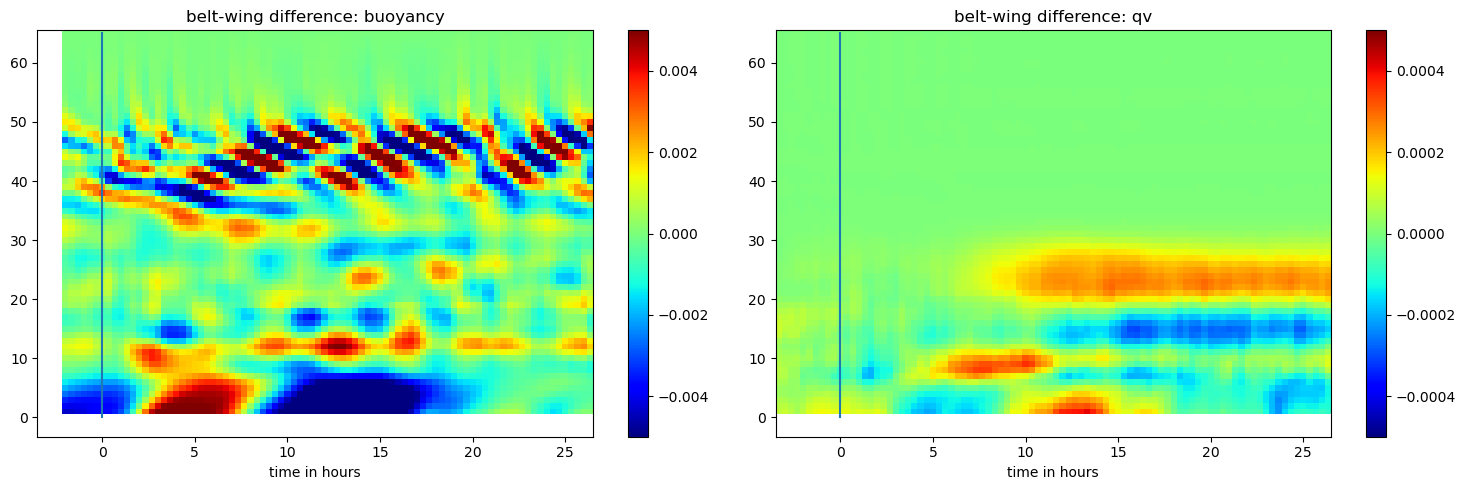

In [311]:
# Buoyancy and qv

beltdiff = beltmean-wingmean

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.pcolormesh(t,z, beltdiff.buoyancy.rolling(time=5).mean().transpose() , cmap='jet', vmin = -5e-3, vmax=5e-3); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('belt-wing difference: buoyancy');

plt.subplot(122)
plt.pcolormesh(t,z, beltdiff.qv.transpose() , cmap='jet', vmin = -5e-4, vmax=5e-4); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('belt-wing difference: qv');

plt.tight_layout()

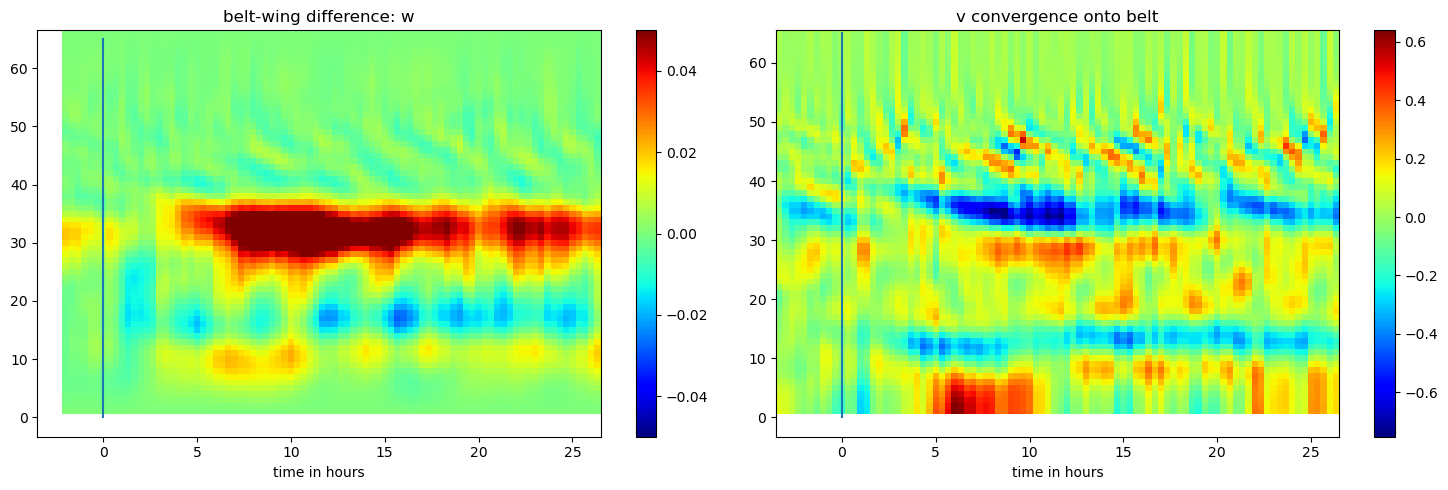

In [312]:
# w and v-convergence 
z1 = np.arange(1,67,1)
wingdiffv =(ds3d.v.isel(njp1=slice(0,29)).mean('njp1')*0.5 - ds3d.v.isel(njp1=slice(91,120-1)).mean('njp1')*0.5) .mean('ni')

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.pcolormesh(t,z1, beltdiff.w.rolling(time=5).mean().transpose() , cmap='jet', vmin = -5e-2, vmax=5e-2); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('belt-wing difference: w');

plt.subplot(122)
plt.pcolormesh(t,z, wingdiffv.transpose() , cmap='jet'); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('v convergence onto belt');

plt.tight_layout()